# Importing Modules

In [1]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.autograd import Variable
from torchvision import utils
from torchvision import datasets
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

# Loading Data

In [2]:
# MNIST dataset
mnist_train = datasets.MNIST(root='../data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
print("Downloading Train Data Done ! ")

mnist_test = datasets.MNIST(root='../data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
print("Downloading Test Data Done ! ")

# Defining Model

In [3]:
# our model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, 10)
    
    def forward(self, X):
        X = F.relu((self.linear1(X)))
        X = self.linear2(X)
        return X

model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Phase

In [4]:
batch_size = 100

data_iter = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True, num_workers=1)

print("Iteration maker Done !")

# Training loop
for epoch in range(10):
    avg_loss = 0
    total_batch = len(mnist_train) // batch_size
    for i, (batch_img, batch_lab) in enumerate(data_iter):
        X = Variable(batch_img.view(-1, 28*28))
        Y = Variable(batch_lab)
        
        y_pred = model.forward(X)
        
        loss = criterion(y_pred, Y)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss
        if (i+1)%100 == 0 :
            print("Epoch : ", epoch+1, "Iteration : ", i+1, " Loss : ", avg_loss.data.numpy()/(i+1))
    print("Epoch : ", epoch+1, " Loss : ", avg_loss.data.numpy()/total_batch)
print("Training Done !")

Iteration maker Done !
Epoch :  1 Iteration :  100  Loss :  0.7335117340087891
Epoch :  1 Iteration :  200  Loss :  0.5353356552124023
Epoch :  1 Iteration :  300  Loss :  0.4490953063964844
Epoch :  1 Iteration :  400  Loss :  0.3968754959106445
Epoch :  1 Iteration :  500  Loss :  0.3602557067871094
Epoch :  1 Iteration :  600  Loss :  0.3354418182373047
Epoch :  1  Loss :  0.3354418182373047
Epoch :  2 Iteration :  100  Loss :  0.1705564498901367
Epoch :  2 Iteration :  200  Loss :  0.15946409225463867
Epoch :  2 Iteration :  300  Loss :  0.15276912689208985
Epoch :  2 Iteration :  400  Loss :  0.15057459831237793
Epoch :  2 Iteration :  500  Loss :  0.14503700256347657
Epoch :  2 Iteration :  600  Loss :  0.14219139099121095
Epoch :  2  Loss :  0.14219139099121095
Epoch :  3 Iteration :  100  Loss :  0.10364503860473633
Epoch :  3 Iteration :  200  Loss :  0.09850584030151367
Epoch :  3 Iteration :  300  Loss :  0.09970076243082682
Epoch :  3 Iteration :  400  Loss :  0.09775398254

# Evaluation

In [5]:
test_img = mnist_test.test_data.view(-1, 28*28).type(torch.FloatTensor)
test_lab = mnist_test.test_labels
outputs = model.forward(test_img)
pred_val, pred_idx = torch.max(outputs.data, 1)
correct = (pred_idx == test_lab).sum()
print('Accuracy : ', correct.data.numpy()/len(test_img)*100)

Accuracy :  97.95


# Testing

Label :  [2]
Prediction :  [2]


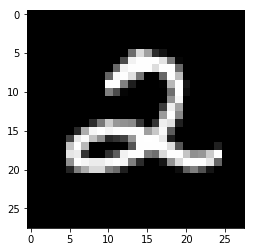

In [6]:
r = np.random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1,28*28).float()
Y_single_data = mnist_test.test_labels[r:r + 1]

single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_prediction.data, 1)[1].numpy())